## Observations and Insights 

In [46]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merge_df = pd.merge(mouse_metadata, study_results, on="Mouse ID")

# Display the data table for preview
merge_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [47]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint
merge_df[merge_df.duplicated()]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.0,0


In [48]:
# Only one mouse with duplicate data -- dropping all data for this mouse (#g989)
merge_df = merge_df.drop(merge_df.loc[merge_df["Mouse ID"]=="g989"].index)

In [49]:
# Mouse count
merge_df["Mouse ID"].value_counts()
mouse_count = len(merge_df["Mouse ID"].value_counts())
print(f"Number of mice: {mouse_count}")

Number of mice: 248


In [50]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for 
# each regimen

# Use groupby and summary statistical methods to calculate the statistics
summary_df = merge_df.groupby(["Drug Regimen"])

In [51]:
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
drug_mean = summary_df["Tumor Volume (mm3)"].mean()
drug_median = summary_df["Tumor Volume (mm3)"].median()
drug_variance = summary_df["Tumor Volume (mm3)"].var()
drug_sd =  summary_df["Tumor Volume (mm3)"].std()
drug_std_err = summary_df["Tumor Volume (mm3)"].sem()

In [52]:
# Assemble the resulting series into a single summary dataframe
summary_stats = pd.DataFrame({"Mean Tumor Volume": drug_mean,
                             "Median Tumor Volume":drug_median,
                             "Tumor Volume Variance": drug_variance,
                              "Tumor Volume Standard Dev.": drug_sd, 
                                "Tumor Volume Std. Error": drug_std_err})
summary_stats

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Standard Dev.,Tumor Volume Std. Error
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [53]:
# Using the aggregation method, produce the same summary statistics in a single line
summary_df["Tumor Volume (mm3)"].agg(['mean', 'sum', 'median', 'var', 'std', 'sem'])

,mean,sum,median,var,std,sem
Drug Regimen,,,,,,
Capomulin,40.675741,9355.420462,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,9361.228582,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,9413.493529,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,10384.299876,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,10105.671026,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,9780.078122,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,7743.497619,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,9169.417875,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,9816.199991,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

In [54]:
# Importing font manager for plots
import matplotlib.font_manager

In [55]:
# Using groupby to create appropriate counts for bar plots
mice_tested_bar = merge_df.groupby(['Drug Regimen'])['Mouse ID'].count().sort_values(ascending=False)

<function matplotlib.pyplot.show(*args, **kw)>

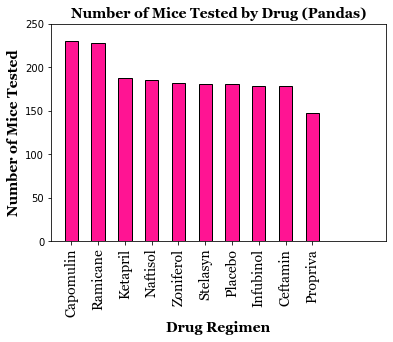

In [60]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas
mice_tested_bar.plot.bar(color='deeppink', edgecolor='k')

# Font formatting
csfont = {'fontname': "Georgia"}

# Set the title and axis labels
plt.title("Number of Mice Tested by Drug (Pandas)", fontsize=14, fontweight='bold',**csfont)
plt.xlabel('Drug Regimen', fontsize=14, fontweight='bold', **csfont)
plt.ylabel("Number of Mice Tested", fontsize=14, fontweight='bold', **csfont)
plt.xticks(fontsize=14, **csfont)

# Set the x limits of the current chart (spacing between bars)
plt.xlim(-0.75, len('Drug Regimen')-0.25)

# Set the y limit (range) of the current chart
plt.ylim(0, 250)

plt.show

<function matplotlib.pyplot.show(*args, **kw)>

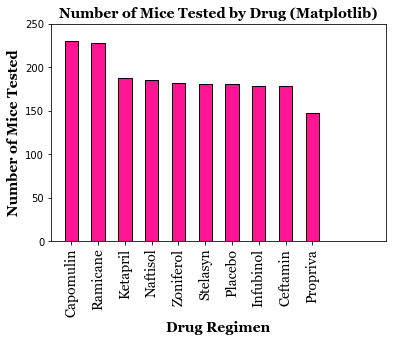

In [61]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using matplotlib 
# Specifying that drug regimen (an index) is going to be used as the x-axis variable
mice_tested_bar.reset_index().plot.bar(x='Drug Regimen', legend=False, color='deeppink', edgecolor='k')

# Font formatting
csfont = {'fontname': "Georgia"}

# Set the title and axis labels
plt.title("Number of Mice Tested by Drug (Matplotlib)", fontsize=14, fontweight='bold', **csfont)
plt.xlabel('Drug Regimen', fontsize=14, fontweight='bold', **csfont)
plt.ylabel("Number of Mice Tested", fontsize=14, fontweight='bold', **csfont)
plt.xticks(fontsize=14, **csfont)

# Set the x limits of the current chart (spacing between bars)
plt.xlim(-0.75, len('Drug Regimen')-0.25)

# Set the y limit (range) of the current chart
plt.ylim(0, 250)

plt.show

In [62]:
# Using groupby to create appropriate counts for pie plots
mice_tested_pie = merge_df.groupby(['Sex'])['Mouse ID'].count()

<function matplotlib.pyplot.show(*args, **kw)>

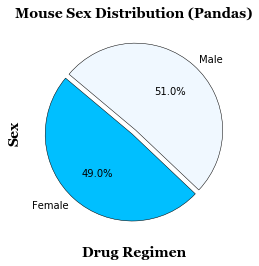

In [63]:
# Formatting pie plot
colors = ['deepskyblue', 'aliceblue']
explode = (0.03, 0.03)
csfont = {'fontname': "Georgia"}

# Generate a pie plot showing the distribution of female versus male mice using pandas
mice_tested_pie.plot.pie(autopct="%1.1f%%", colors=colors, explode=explode, startangle=140,
                         wedgeprops={"edgecolor":"k",'linewidth': .5})
                                                                     
# Set the title and axis labels
plt.title("Mouse Sex Distribution (Pandas)", fontsize=14, fontweight='bold', **csfont)
plt.xlabel('Drug Regimen', fontsize=14, fontweight='bold', **csfont)
plt.ylabel("Sex", fontsize=14, fontweight='bold', **csfont)

plt.show

<function matplotlib.pyplot.show(*args, **kw)>

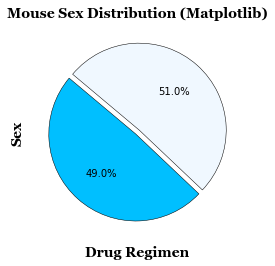

In [64]:
# Formatting pie plot
colors = ['deepskyblue', 'aliceblue']
explode = (0.03, 0.03)
csfont = {'fontname': "Georgia"}

# Generate a pie plot showing the distribution of female versus male mice using matplotlib
plt.pie(mice_tested_pie, autopct="%1.1f%%", colors=colors, explode=explode, startangle=140,
        wedgeprops={"edgecolor":"k",'linewidth': .5})

# Set the title and axis labels
plt.title("Mouse Sex Distribution (Matplotlib)", fontsize=14, fontweight='bold', **csfont)
plt.xlabel('Drug Regimen', fontsize=14,fontweight='bold', **csfont)
plt.ylabel("Sex", fontsize=14, fontweight='bold', **csfont)

plt.show

## Quartiles, Outliers and Boxplots

In [65]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [66]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [67]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [68]:
# Generate line & scatter plots of tumor volume vs. time point for a mouse treated with Capomulin

# Locating mice who were treated with Capomulin
capomulin_mice = merge_df.loc[merge_df["Drug Regimen"]=="Capomulin"]

# Selecting a mouse randomly (from only those who were treated with Capomulin)
pick_mouse = capomulin_mice.sample()
pick_mouse

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
432,i557,Capomulin,Female,1,24,5,42.261665,0


In [69]:
# Locating the mouse by ID
get_data = pick_mouse.iloc[0]['Mouse ID']

# Getting all data for the randomly selected mouse
selected_mouse_data = merge_df.loc[merge_df["Mouse ID"]==get_data]

(0, 45)

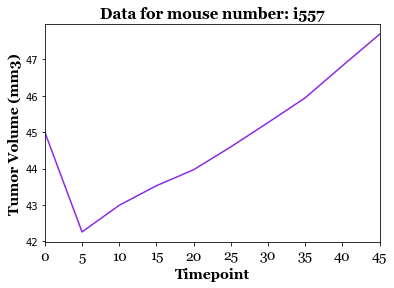

In [71]:
# Set x axis and variables
Timepoint = np.arange(0, 45, 5)

# Generate a line plot of tumor volume vs. time point for the randomly selected mouse treated with Capomulin
selected_mouse_data.plot.line('Timepoint', 'Tumor Volume (mm3)', legend=False, color='blueviolet')

# Font formatting
csfont = {'fontname': "Georgia"}

# Set the title and axis labels
plt.title(f"Data for mouse number: {get_data}", fontsize=15, fontweight='bold', **csfont)
plt.xlabel('Timepoint', fontsize=14, fontweight='bold', **csfont)
plt.ylabel('Tumor Volume (mm3)', fontsize=14, fontweight='bold', **csfont)
plt.xticks(fontsize=14, **csfont)

plt.xlim(0, 45)

In [474]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
